In [1]:
%matplotlib inline
import numpy as np
import scipy as sp

import numpy.linalg as LA

from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("white")

#### 1. Read the input

In [3]:
points = np.loadtxt("points.txt",dtype=float)
N,n = points.shape

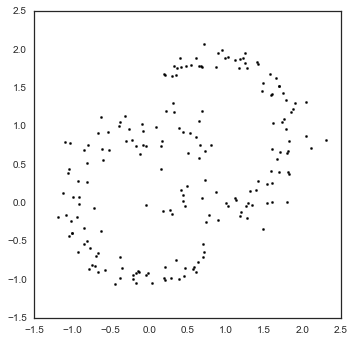

In [4]:
if n == 2:
    plt.scatter(points[:,0],points[:,1],c="k",marker=".")
    plt.axis("scaled")

#### 2. KNN Graph

In [5]:
k=5 # k nearest neighbours

In [6]:
xTx = points.dot(points.T)
v = np.diag(xTx)
d = np.sqrt(v - 2*xTx + v[:,None])

In [7]:
kthSmallest = lambda a,n: np.partition(a, n-1)[n-1] #kth smallest element of 

In [8]:
border = np.apply_along_axis(kthSmallest,0,d,k+1)
knn = d <= border
knn = knn + knn.T*(1-knn)
np.fill_diagonal(knn,0)

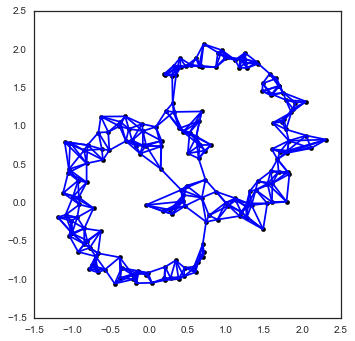

In [9]:
edges = [[points[i,:],points[j,:]] for i in range(N) for j in range(i+1,N) if knn[i,j]]
if n==2:
    fig = plt.figure
    plt.gca().add_collection(LineCollection(edges))
    plt.scatter(points[:,0],points[:,1],c="k",marker="o")
    plt.axis("scaled")

#### 3. Construct the weight matrix

In [10]:
sig = 0.3

In [11]:
W = np.exp(-0.5*((d/sig)**2))*knn
L = np.eye(N) - W/np.sum(W,axis=0)
L_row = L.T

#### 4. Eigenvector of Laplacian

We know $L$'s smallest eigenvalue is 0 with eigenvector $1^n$. So two find second smallest, we can add $I$ to L so that it becomes positive definite and take its inverse. It doesn't changes the eigenvectors. Then to find new second largest (old second smallest) eigenvalue in each inverse iteration we could continue with a unit vector that is orthogonal to $1^n$

In [12]:
v0 = np.ones(N,dtype=np.float)/np.sqrt(N)
v = np.random.randn(N)

In [13]:
K = L_row + np.eye(N)
for i in range(1000):
    v = LA.solve(K,v)
    v = (v - v0.dot(v)*v0)
    v = v/LA.norm(v)

#### 5. Histogram

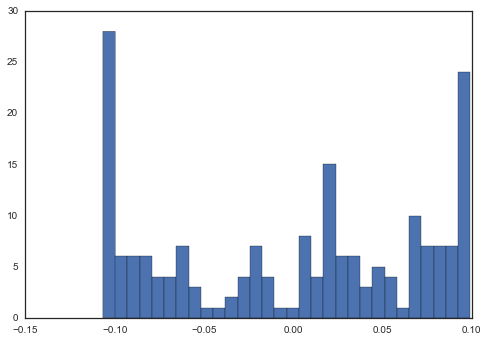

In [14]:
plt.hist(v,bins=30)
plt.show()

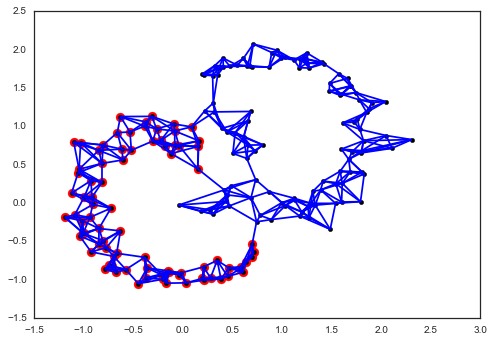

In [15]:
tau = 0
cluster1 = points[v < tau]
cluster2 = points[v >= tau]
if n==2:
    plt.gca().add_collection(LineCollection(edges)) 
    plt.scatter(cluster1[:,0],cluster1[:,1], s=80, facecolors='r', edgecolors='r')
    plt.scatter(points[:,0],points[:,1],c="k",marker="o")
    plt.show()

In [26]:
def project3(points,k,sigma,tau):
    N,n = points.shape
    
    if n == 2:
        plt.figure()
        plt.scatter(points[:,0],points[:,1],c="k",marker=".")
        plt.axis("scaled")
    
    xTx = points.dot(points.T)
    v = np.diag(xTx)
    d = np.sqrt(v - 2*xTx + v[:,None])
    
    kthSmallest = lambda a,n: np.partition(a, n-1)[n-1] #kth smallest element of 
    border = np.apply_along_axis(kthSmallest,0,d,k+1)
    knn = d <= border
    knn = knn + knn.T*(1-knn)
    np.fill_diagonal(knn,0)
    
    edges = [[points[i,:],points[j,:]] for i in range(N) for j in range(i+1,N) if knn[i,j]]
    if n==2:
        plt.figure()
        plt.gca().add_collection(LineCollection(edges))
        plt.scatter(points[:,0],points[:,1],c="k",marker="o")
        plt.axis("scaled")
    
    W = np.exp(-0.5*((d/sig)**2))*knn
    L = np.eye(N) - W/np.sum(W,axis=0)
    L_row = L.T
    
    v0 = np.ones(N,dtype=np.float)/np.sqrt(N)
    v = np.random.randn(N)
    
    K = L_row + np.eye(N) # to make L inversible
    for i in range(1000):
        v = LA.solve(K,v)
        v = (v - v0.dot(v)*v0)
        v = v/LA.norm(v)
    
    plt.figure()
    plt.hist(v,bins=30)
    plt.show()
    
    cluster1 = points[v < tau]
    cluster2 = points[v >= tau]
    if n==2:
        plt.figure()
        plt.gca().add_collection(LineCollection(edges)) 
        plt.scatter(cluster1[:,0],cluster1[:,1], s=80, facecolors='r', edgecolors='r')
        plt.scatter(points[:,0],points[:,1],c="k",marker="o")
        plt.show()
    
    Labels = np.ones(N)
    Labels[v < tau] = 2
    
    return Labels,W

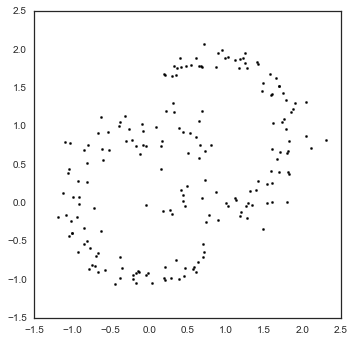

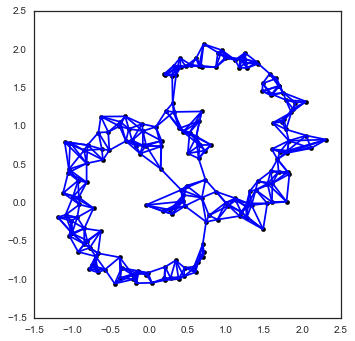

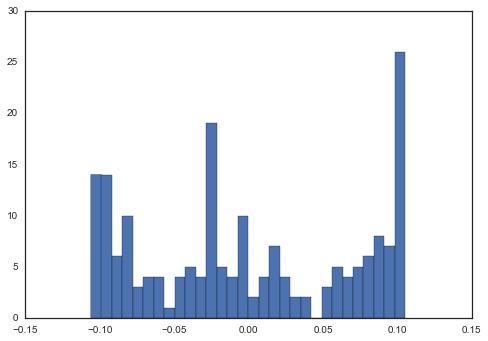

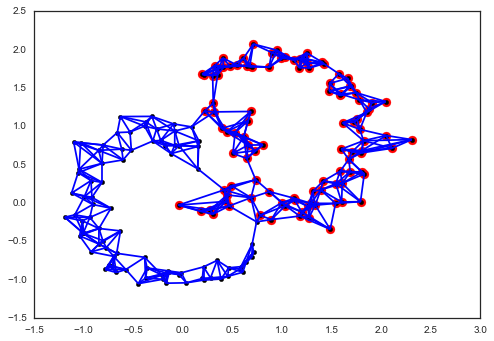

(array([ 2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,
         2.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  2.,
         2.,  2.,  1.,  1.,  1.,  2.,  1.,  2.,  2.,  2.,  1.,  1.,  2.,
         1.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  1.,  1.,
         1.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,
         2.,  2.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  2.,
         2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,
         2.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  2.,  2.,  2.,
         2.,  1.,  1.,  2.,  2.,  2.,  1.,  1.,  2.,  1.,  2.,  2.,  2.,
         2.,  1.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,
         2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,
         2.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,
         2.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  2.

In [27]:
project3(points,k,sig,tau)